# Loudness Multi-Axis test

In this notebook, we check the `loudness` of the `fe` module.

## Step 1: Import libraries

In [1]:
import numpy as np
from caits.visualization import plot_signal
from caits.fe import dBFS

## Step 2: Initialize dataset

In [2]:
# Parameters
n_samples = 1000
sample_rate = 1000  # Hz
duration = 1.0

# Time array
t = np.linspace(0, duration, n_samples, endpoint=False)

# Create 3 known-amplitude sine wave channels
ch1 = 1.0 * np.sin(2 * np.pi * 5 * t)    # Full scale
ch2 = 0.5 * np.sin(2 * np.pi * 5 * t)    # -6.02 dBFS
ch3 = 0.25 * np.sin(2 * np.pi * 5 * t)   # -12.04 dBFS

# Stack into shape (samples, channels)
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape


(1000, 3)

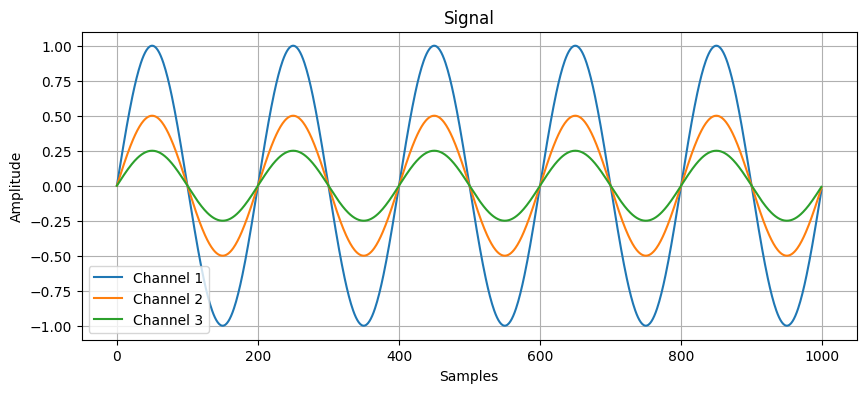

In [3]:
plot_signal(
    data,
    sr=sample_rate,
    return_mode=False
)

## Step 3: dBFS

In [4]:
dbfs_sig = dBFS(data, sample_width=2)
dbfs_sig.shape

(3,)

In [5]:
dbfs_sig

array([ -93.31929866,  -99.33989857, -105.36049848])

# Real-world data

In [6]:
from IPython.display import Audio
from caits.loading import wav_loader, wav_specs_check

print(wav_specs_check("data/jmp-last-night.wav"))
specs = wav_specs_check("data/jmp-last-night.wav")
audio_stereo, sample_rate = wav_loader("data/jmp-last-night.wav")
print(f"shape: {audio_stereo.shape} - Sampling rate: {sample_rate}")
Audio(audio_stereo.values.T, rate=sample_rate)

{'nchannels': 2, 'sampwidth': 2, 'framerate': 44100, 'nframes': 605391, 'comptype': 'NONE', 'compname': 'not compressed'}
shape: (605391, 2) - Sampling rate: 44100


In [7]:
audio_arr = audio_stereo.values

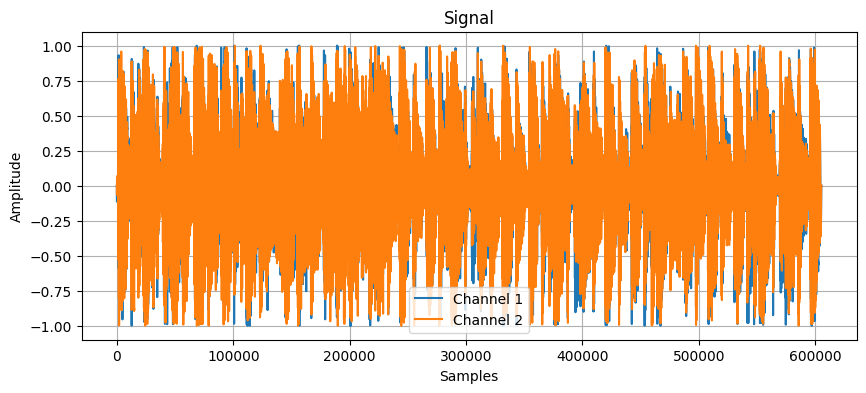

In [8]:
plot_signal(
    audio_arr,
    sr=sample_rate,
    return_mode=False
)

In [9]:
dbfs_audio = dBFS(audio_arr, sample_width=2)
dbfs_audio.shape

(2,)

In [10]:
dbfs_audio

array([-100.67504564, -100.48495636])